In [1]:
from platform import python_version
print(python_version())

3.6.9


In [2]:
import numpy as np
from numpy.random import seed
seed(1)

import os
import csv
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('H1full.csv')
df = df.sample(n = 100)
a=df.head()
b=df
b
b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
45,1,47,2015,July,27,2,2,5,2,2,...,No Deposit,240,NULL,0,Transient,153.00,0,0,Canceled,2015-06-02
15371,0,186,2015,July,28,7,0,4,2,0,...,No Deposit,240,NULL,0,Transient,154.00,0,1,Check-Out,2015-07-11
15588,0,33,2015,July,30,20,2,5,2,2,...,No Deposit,242,NULL,0,Transient,168.30,0,1,Check-Out,2015-07-27
684,0,43,2015,July,30,25,2,4,2,0,...,No Deposit,250,NULL,0,Transient,134.00,0,0,Check-Out,2015-07-31
16085,0,51,2015,August,32,7,2,5,2,0,...,No Deposit,240,NULL,0,Transient,166.50,0,1,Check-Out,2015-08-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12705,1,17,2017,July,28,13,0,1,1,0,...,No Deposit,NULL,20,0,Transient,135.00,0,0,No-Show,2017-07-13
38804,0,18,2017,July,30,29,0,1,2,2,...,No Deposit,240,NULL,0,Transient-Party,255.00,0,2,Check-Out,2017-07-30
39412,0,256,2017,August,32,8,2,7,2,1,...,No Deposit,479,NULL,0,Transient,172.81,0,4,Check-Out,2017-08-17
39459,0,17,2017,August,33,16,0,3,2,0,...,No Deposit,241,NULL,0,Transient,178.39,0,1,Check-Out,2017-08-19


In [4]:
IsCanceled = df['IsCanceled']

In [5]:
leadtime = df['LeadTime']
arrivaldateyear = df['ArrivalDateYear']
arrivaldateweekno = df['ArrivalDateWeekNumber']
arrivaldatedayofmonth = df['ArrivalDateDayOfMonth']
staysweekendnights = df['StaysInWeekendNights']
staysweeknights = df['StaysInWeekNights']
adults = df['Adults']
children = df['Children']
babies = df['Babies']
previouscancellations = df['PreviousCancellations']
previousbookingsnotcanceled = df['PreviousBookingsNotCanceled']
bookingchanges = df['BookingChanges']
dayswaitinglist = df['DaysInWaitingList']
adr = df['ADR']
rcps = df['RequiredCarParkingSpaces']
totalsqr = df['TotalOfSpecialRequests']

In [6]:
df.MarketSegment

10871        Online TA
7752         Online TA
35566    Offline TA/TO
1353         Online TA
17532        Online TA
             ...      
1312         Online TA
10364           Groups
16113           Direct
23633        Online TA
23406           Direct
Name: MarketSegment, Length: 100, dtype: object

In [7]:
df.MarketSegment[0:20]

10871        Online TA
7752         Online TA
35566    Offline TA/TO
1353         Online TA
17532        Online TA
37792        Corporate
19279           Direct
16294           Direct
18707        Corporate
6113         Online TA
6409         Online TA
3568         Online TA
31780           Direct
23123        Online TA
29768        Online TA
11895        Online TA
22704        Online TA
30202        Online TA
23618           Groups
35322        Online TA
Name: MarketSegment, dtype: object

In [8]:
arrivaldatemonth = df.ArrivalDateMonth.astype("category").cat.codes
arrivaldatemonthcat=pd.Series(arrivaldatemonth)
mealcat=df.Meal.astype("category").cat.codes
mealcat=pd.Series(mealcat)
countrycat=df.Country.astype("category").cat.codes
countrycat=pd.Series(countrycat)
marketsegmentcat=df.MarketSegment.astype("category").cat.codes
marketsegmentcat=pd.Series(marketsegmentcat)
distributionchannelcat=df.DistributionChannel.astype("category").cat.codes
distributionchannelcat=pd.Series(distributionchannelcat)
reservedroomtypecat=df.ReservedRoomType.astype("category").cat.codes
reservedroomtypecat=pd.Series(reservedroomtypecat)
assignedroomtypecat=df.AssignedRoomType.astype("category").cat.codes
assignedroomtypecat=pd.Series(assignedroomtypecat)
deposittypecat=df.DepositType.astype("category").cat.codes
deposittypecat=pd.Series(deposittypecat)
customertypecat=df.CustomerType.astype("category").cat.codes
customertypecat=pd.Series(customertypecat)
reservationstatuscat=df.ReservationStatus.astype("category").cat.codes
reservationstatuscat=pd.Series(reservationstatuscat)
isrepeatedguestcat = df.IsRepeatedGuest.astype("category").cat.codes
isrepeatedguestcat=pd.Series(isrepeatedguestcat)
agentcat = df.Agent.astype("category").cat.codes
agentcat=pd.Series(agentcat)
companycat = df.Company.astype("category").cat.codes
companycat=pd.Series(companycat)

In [9]:
y1 = marketsegmentcat
y1

10871    4
7752     4
35566    3
1353     4
17532    4
        ..
1312     4
10364    2
16113    1
23633    4
23406    1
Length: 100, dtype: int8

In [10]:
y1[0:20]

10871    4
7752     4
35566    3
1353     4
17532    4
37792    0
19279    1
16294    1
18707    0
6113     4
6409     4
3568     4
31780    1
23123    4
29768    4
11895    4
22704    4
30202    4
23618    2
35322    4
dtype: int8

In [11]:
y1=np.array(y1)

In [12]:
x1 = np.column_stack((leadtime,adr))

In [13]:
from sklearn.preprocessing import scale
X = scale(x1)

In [14]:
X.shape

(100, 2)

In [15]:
y1.shape

(100,)

In [16]:
from sklearn.cluster import KMeans
Y = y1

In [17]:
Y

array([4, 4, 3, 4, 4, 0, 1, 1, 0, 4, 4, 4, 1, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       3, 4, 2, 4, 4, 4, 2, 2, 4, 4, 4, 4, 3, 0, 1, 4, 2, 4, 3, 2, 3, 1,
       4, 4, 3, 4, 1, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 3, 2, 3, 2, 4,
       3, 1, 3, 3, 4, 1, 0, 1, 4, 1, 3, 4, 3, 3, 0, 4, 2, 4, 1, 4, 4, 4,
       4, 4, 1, 3, 4, 4, 1, 4, 2, 1, 4, 1], dtype=int8)

In [18]:
X

array([[ 1.07577693, -1.01441847],
       [-0.75329711,  2.25432473],
       [-0.60321924, -0.80994917],
       [-0.20926483,  0.26328418],
       [ 0.53174465, -0.40967609],
       [-0.82833604,  0.40156369],
       [-0.89399511, -1.01810593],
       [ 0.59740372,  1.40823851],
       [-0.89399511, -1.16560407],
       [ 0.95383866, -0.48416265],
       [-0.34058296,  0.38312642],
       [-0.2749239 , -1.01441847],
       [ 1.02887759, -0.20133496],
       [-0.4719011 , -0.6309233 ],
       [ 0.00647211, -0.36487353],
       [ 2.10756228, -0.44194131],
       [-0.88461524, -0.55385552],
       [-0.3874823 , -0.7821089 ],
       [-0.78143671, -0.23765638],
       [-0.05918696,  0.63866696],
       [ 2.28577975, -0.6309233 ],
       [ 1.07577693,  1.74250618],
       [ 1.27275413, -0.74892182],
       [-0.88461524, -0.92591959],
       [ 0.10965064, -0.48342516],
       [ 1.3665528 ,  0.5121873 ],
       [-0.2749239 ,  1.1329701 ],
       [-0.46252123,  1.02050277],
       [-0.51880043,

In [19]:
km = KMeans(n_clusters = 5, n_jobs = None, random_state = None)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
color_theme = np.array(['firebrick', 'dodgerblue', 'forestgreen', 'goldenrod', 'rebeccapurple'])

Text(0.5, 1.0, 'Labels: Actual')

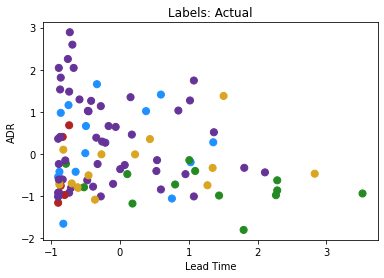

In [21]:
plt.scatter(x=X[:,0],y=X[:,1], c=color_theme[Y], s=50)
plt.xlabel("Lead Time")
plt.ylabel("ADR")
plt.title('Labels: Actual')

In [22]:
km.labels_.astype(float)

array([2., 0., 4., 1., 1., 1., 4., 3., 4., 2., 1., 4., 2., 4., 1., 2., 4.,
       4., 4., 1., 2., 3., 2., 4., 1., 3., 0., 0., 4., 4., 4., 4., 3., 0.,
       1., 4., 4., 0., 2., 4., 2., 2., 4., 3., 4., 3., 1., 0., 0., 0., 0.,
       0., 2., 0., 2., 0., 4., 2., 4., 3., 1., 2., 2., 4., 2., 1., 1., 3.,
       3., 4., 1., 4., 4., 0., 4., 1., 4., 1., 4., 4., 1., 4., 2., 4., 2.,
       2., 1., 1., 4., 1., 4., 1., 0., 0., 4., 1., 2., 0., 4., 1.])

In [23]:
centers = km.cluster_centers_
print(centers)

[[-0.64366991  1.63409504]
 [-0.21139662  0.16832387]
 [ 1.59413799 -0.70910702]
 [ 0.92361464  1.10756765]
 [-0.69563851 -0.77481533]]


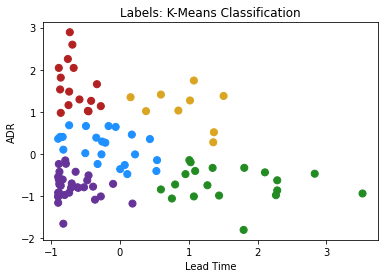

In [24]:
plt.scatter(x=X[:,0],y=X[:,1], c=color_theme[km.labels_], s=50)
plt.xlabel("Lead Time")
plt.ylabel("ADR")
plt.title('Labels: K-Means Classification')
plt.show()

In [25]:
km.labels_

array([2, 0, 4, 1, 1, 1, 4, 3, 4, 2, 1, 4, 2, 4, 1, 2, 4, 4, 4, 1, 2, 3,
       2, 4, 1, 3, 0, 0, 4, 4, 4, 4, 3, 0, 1, 4, 4, 0, 2, 4, 2, 2, 4, 3,
       4, 3, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 4, 2, 4, 3, 1, 2, 2, 4, 2, 1,
       1, 3, 3, 4, 1, 4, 4, 0, 4, 1, 4, 1, 4, 4, 1, 4, 2, 4, 2, 2, 1, 1,
       4, 1, 4, 1, 0, 0, 4, 1, 2, 0, 4, 1], dtype=int32)

In [26]:
Y

array([4, 4, 3, 4, 4, 0, 1, 1, 0, 4, 4, 4, 1, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       3, 4, 2, 4, 4, 4, 2, 2, 4, 4, 4, 4, 3, 0, 1, 4, 2, 4, 3, 2, 3, 1,
       4, 4, 3, 4, 1, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 3, 2, 3, 2, 4,
       3, 1, 3, 3, 4, 1, 0, 1, 4, 1, 3, 4, 3, 3, 0, 4, 2, 4, 1, 4, 4, 4,
       4, 4, 1, 3, 4, 4, 1, 4, 2, 1, 4, 1], dtype=int8)